In [16]:
from graphviz import Digraph

class Node:
    def __init__(self, val):
        self.val = val
        # child node
        self.left = None
        self.right = None
        # smallest/largest values in subtree rooted by this node
        self.min_val = None
        self.max_val = None
        
    def _repr_svg_(self, g=None):
        if g == None:
            g = Digraph()
        label = str(self.val)
        label += " [{} to {}]".format(self.min_val, self.max_val)
        g.node(str(self.val), label)
        if self.left:
            self.left._repr_svg_(g)
            g.edge(str(self.val), str(self.left.val), label="L")
        if self.right:
            self.right._repr_svg_(g)
            g.edge(str(self.val), str(self.right.val), label="R")
        return g._repr_svg_()
    
    def set_range(self):
        # build list of root value, and smallest
        # found in child subtrees (if we have children)
        min_vals = [self.val]
        max_vals = [self.val]

        for child in [self.left, self.right]:
            if child == None:
                continue
            child.set_range()
            min_vals.append(child.min_val)
            max_vals.append(child.max_val)
        self.min_val = min(min_vals)
        self.max_val = max(max_vals)
        
    def is_bst(self):
        if self.left != None:
            # step 1: is this node's val bigger than all those to the left?
            if self.left.max_val >= self.val:
                return False
            
            # step 2: do our left children also obey this property?
            if not self.left.is_bst():
                return False
            # TODO: finish this part

        if self.right != None:
            # step 1: is this node's val bigger than all those to the left?
            # TODO: finish this part
            if self.right.min_val <= self.val:
                return False
            # step 2: do our left children also obey this property?
            if not self.right.is_bst():
                return False

        return True

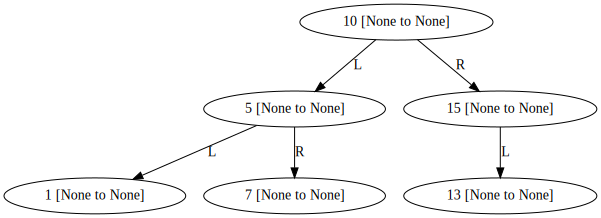

In [17]:
root = Node(10)
root.left = Node(5)
root.left.left = Node(1)
root.left.right = Node(7)
root.right = Node(15)
root.right.left = Node(13)
root

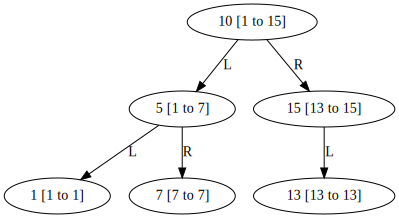

In [18]:
root.set_range()
root

True


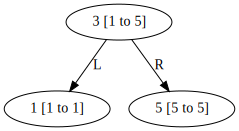

In [19]:
root = Node(3)
root.left = Node(1)
root.right = Node(5)
root.set_range()
print(root.is_bst()) # should be True
root

False


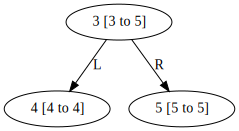

In [20]:
root = Node(3)
root.left = Node(4)
root.right = Node(5)
root.set_range()
print(root.is_bst()) # should be False
root

False


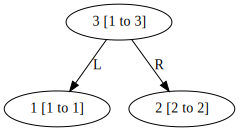

In [21]:
root = Node(3)
root.left = Node(1)
root.right = Node(2)
root.set_range()
print(root.is_bst()) # should be False
root

False


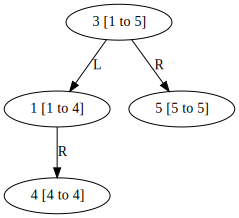

In [22]:
root = Node(3)
root.left = Node(1)
root.left.right = Node(4)
root.right = Node(5)
root.set_range()
print(root.is_bst()) # should be False
root

False


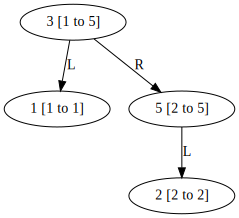

In [23]:
root = Node(3)
root.left = Node(1)
root.right = Node(5)
root.right.left = Node(2)
root.set_range()
print(root.is_bst()) # should be False
root

True


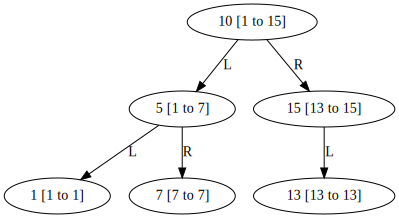

In [24]:
root = Node(10)
root.left = Node(5)
root.left.left = Node(1)
root.left.right = Node(7)
root.right = Node(15)
root.right.left = Node(13)
root.set_range()
print(root.is_bst()) # should be True
root